In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 100)

raw_df = (pd.read_csv("data.csv"))
#display(raw_df.columns)
display(raw_df)

id                            listing_url       scrape_id  \
0          2818      https://www.airbnb.com/rooms/2818  20201009050447   
1         20168     https://www.airbnb.com/rooms/20168  20201009050447   
2         25428     https://www.airbnb.com/rooms/25428  20201009050447   
3         27886     https://www.airbnb.com/rooms/27886  20201009050447   
4         28871     https://www.airbnb.com/rooms/28871  20201009050447   
...         ...                                    ...             ...   
18777  45761390  https://www.airbnb.com/rooms/45761390  20201009050447   
18778  45763935  https://www.airbnb.com/rooms/45763935  20201009050447   
18779  45776325  https://www.airbnb.com/rooms/45776325  20201009050447   
18780  45777642  https://www.airbnb.com/rooms/45777642  20201009050447   
18781  45783000  https://www.airbnb.com/rooms/45783000  20201009050447   

      last_scraped                                               name  \
0       2020-10-11           Quiet Garden View Room & Super Fast WiFi   
1       2020-10-11       Studio with private bathroom in the centre 1   
2       2020-10-11    Lovely apt in City Centre (w.lift) near Jordaan   
3       2020-10-10  Romantic, stylish B&B houseboat in canal district   
4       2020-10-10                            Comfortable double room   
...            ...                                                ...   
18777   2020-10-10              Charming 1Room Apartment in Amsterdam   
18778   2020-10-10         clean and light apartment nearby the water   
18779   2020-10-13   A beautiful spacious room on a central location.   
18780   2020-10-13                                Studio in Amsterdam   
18781   2020-10-10             Spacious and cozy apartment in De Pijp   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/10272854/8dcc...       3159   
1      https://a0.muscache.com/pictures/69979628/fd6a...      59484   
2      https://a0.muscache.com/pictures/138431/7079a9...      56142   
3      https://a0.muscache.com/pictures/02c2da9d-660e...      97647   
4      https://a0.muscache.com/pictures/160889/362340...     124245   
...                                                  ...        ...   
18777  https://a0.muscache.com/pictures/766447f8-1ec7...  310835509   
18778  https://a0.muscache.com/pictures/8b4d4ef5-8b9f...     961670   
18779  https://a0.muscache.com/pictures/4339516f-0f3b...   48168060   
18780  https://a0.muscache.com/pictures/2ef85d3f-9c1e...   75268907   
18781  https://a0.muscache.com/pictures/adfb4e2b-2428...  371160113   

                                          host_url   host_name  host_since  \
0           https://www.airbnb.com/users/show/3159      Daniel  2008-09-24   
1          https://www.airbnb.com/users/show/59484   Alexander  2009-12-02   
2          https://www.airbnb.com/users/show/56142        Joan  2009-11-20   
3          https://www.airbnb.com/users/show/97647        Flip  2010-03-23   
4         https://www.airbnb.com/users/show/124245       Edwin  2010-05-13   
...                                            ...         ...         ...   
18777  https://www.airbnb.com/users/show/310835509  TravelNest  2019-11-20   
18778     https://www.airbnb.com/users/show/961670        Lisa  2011-08-12   
18779   https://www.airbnb.com/users/show/48168060         Tim  2015-11-04   
18780   https://www.airbnb.com/users/show/75268907        Emma  2016-06-01   
18781  https://www.airbnb.com/users/show/371160113     Nadezda  2020-10-08   

                                   host_location  host_response_time  \
0      Amsterdam, Noord-Holland, The Netherlands                 NaN   
1      Amsterdam, Noord-Holland, The Netherlands                 NaN   
2              New York, New York, United States  within a few hours   
3      Amsterdam, Noord-Holland, The Netherlands                 NaN   
4      Amsterdam, Noord-Holland, The Netherlands      within an hour   
...                      

In [2]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', #Очень много пропущенных! 67%
#     'host_acceptance_rate': 'Percentage', #Очень много пропущенных! 44%
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
#    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
    'neighbourhood_cleansed': 'Id',
#     'neighbourhood_group_cleansed': 'Id',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
    'property_type': 'Id',
   'room_type': 'Id',
    'accommodates': 'Float',
#     'bathrooms': 'Float', #Очень много пропущенных! 100%!!!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
#     'beds': 'Float',
    'amenities': 'Id',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
#    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
    'availability_90': 'Float',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Id',  #Очень много пропущенных! 100%!!!
    'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

index = range(0, len(raw_df));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
# Что-то делаем с данными
# df['price'] = np.log(df['price'])
    
#display(df)

In [3]:
from collections import defaultdict
PROPERTY_MAPPING = defaultdict(lambda: 'Other')

PROPERTY_MAPPING.update({
    'Entire apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Entire condominium': 'Apartment',
    'Entire serviced apartment':'Apartment',
    'Entire townhouse': 'House',
    'Entire house': 'House',
    'Private room in house': 'Room',
    'Private room in bed and breakfast': 'Room',
    'Private room in townhouse':'Room',
    'Private room in apartment': 'Room',
})

df['property_type_computed'] = df['property_type'].map(PROPERTY_MAPPING)


FREQ_MAPPING = defaultdict(lambda: 'Other')

FREQ_MAPPING.update({
    'Entire apartment': 'Entire apartment',
    'Entire loft': 'Entire loft',
    'Entire condominium': 'Entire condominium',
    'Entire serviced apartment':'Entire serviced apartment',
    'Entire townhouse': 'Entire townhouse',
    'Entire house': 'Entire house',
    'Private room in house': 'Private room in house',
    'Private room in bed and breakfast': 'Private room in bed and breakfast',
    'Private room in townhouse':'Private room in townhouse',
    'Private room in apartment': 'Private room in apartment',
})

df['property_type_freq'] = df['property_type'].map(FREQ_MAPPING)

In [4]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('] [', ',')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

regex_mapping = {
    '24-hour check-in': 'check_in_24h',
    'Air conditioning|Central air conditioning': 'air_conditioning',
    'Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV': 'high_end_electronics',
    'BBQ grill|Fire pit|Propane barbeque': 'bbq',
    'Balcony|Patio': 'balcony',
    'Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront': 'nature_and_views',
    'Bed linens': 'bed_linen',
    'Breakfast': 'breakfast',
    'TV': 'tv',
    'Coffee maker|Espresso machine': 'coffee_machine',
    'Cooking basics': 'cooking_basics',
    'Dishwasher|Dryer|Washer': 'white_goods',
    'Elevator': 'elevator',
    'Exercise equipment|Gym|gym': 'gym',
    'Family/kid friendly|Children|children': 'child_friendly',
    'parking': 'parking',
    'Garden|Outdoor|Sun loungers|Terrace': 'outdoor_space',
    'Host greets you': 'host_greeting',
    'Hot tub|Jetted tub|hot tub|Sauna|Pool|pool': 'hot_tub_sauna_or_pool',
    'Internet|Pocket wifi|Wifi': 'internet',
    'Long term stays allowed': 'long_term_stays',
    'Pets|pet|Cat(s)|Dog(s)': 'pets_allowed',
    'Private entrance': 'private_entrance',
    'Safe|Security system': 'secure',
    'Self check-in': 'self_check_in',
    'Smoking allowed': 'smoking_allowed',
    'Step-free access|Wheelchair|Accessible': 'accessible',
    'Suitable for events': 'event_suitable',
}

for regex, value in regex_mapping.items():
    df.loc[df['amenities'].str.contains(regex), value] = 1

cols_to_replace_nulls = df.iloc[:,df.columns.get_loc("check_in_24h"):].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

infrequent_amenities = []
for col in df.iloc[:,df.columns.get_loc("check_in_24h"):].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
# print(infrequent_amenities)

df.drop(infrequent_amenities, axis=1, inplace=True)

# df.drop('amenities', axis=1, inplace=True)

INCLUDED_AMENITIES = list(set(regex_mapping.values()).difference(amenities_set, infrequent_amenities))

print(INCLUDED_AMENITIES)

['bed_linen', 'private_entrance', 'internet', 'coffee_machine', 'outdoor_space', 'cooking_basics', 'balcony', 'host_greeting', 'parking', 'white_goods', 'long_term_stays', 'tv']


In [5]:
# Заполняем отсутствующие рейтинги
# df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

<AxesSubplot:xlabel='count', ylabel='neighbourhood_cleansed'>

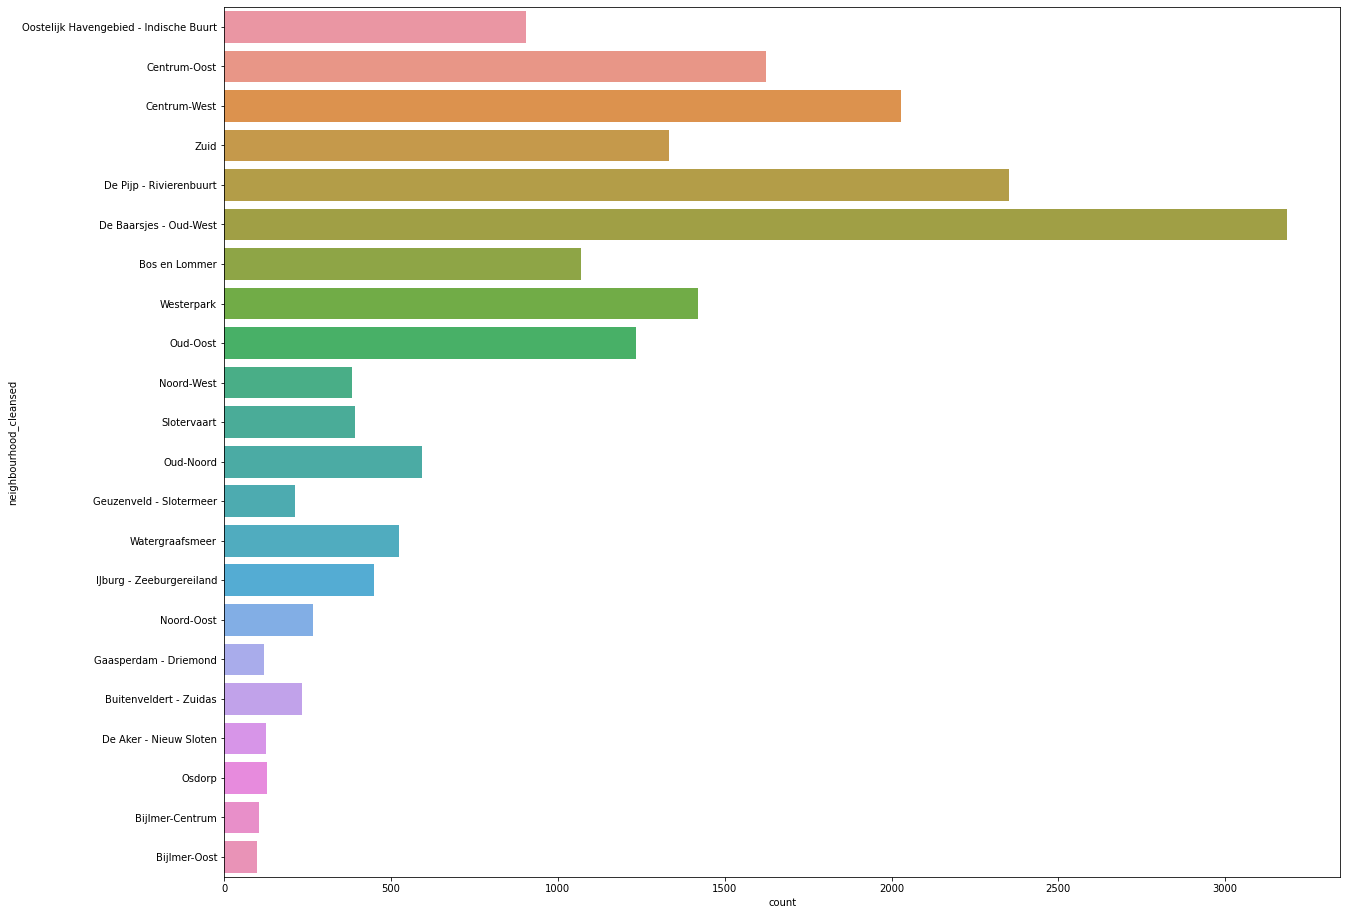

In [6]:
plt.figure(figsize=(20, 16))
sns.countplot(y='neighbourhood_cleansed', data=df)
# sns.barplot(x = df['price'].median(), y = df['neighbourhood_cleansed'])

In [7]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost               0.30
host_listings_count             0.30
host_identity_verified          0.30
neighbourhood_cleansed          0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bedrooms                        5.26
amenities                       0.00
price                           0.00
minimum_nights                  0.00
maximum_nights                  0.00
availability_90                 0.00
number_of_reviews               0.00
review_scores_rating           13.53
review_scores_accuracy         13.59
review_scores_cleanliness      13.59
review_scores_checkin          13.64
review_scores_communication    13.59
review_scores_location         13.62
review_scores_value            13.62
instant_bookable                0.00
reviews_per_month              12.19
property_type_computed          0.00
property_type_freq              0.00
balcony                         0.00
bed_linen                       0.00
t

In [8]:
# Убираем пропущенные
no_na_df = df.dropna()
print('Percentage left: ' + str(100 * (len(no_na_df)/len(df))))
df = no_na_df

# Дропаем листинги дороже 1000 долларов за ночь - их мало
#under_1k = df.where(df['price'].le(1000))
#df=under_1k
#df.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')

Percentage left: 81.57278245128315


In [9]:


import matplotlib.pyplot as plt

# for column in df.columns:
#     series = df[column]
#     print(column)
#     plt.hist(series,100)
#     plt.show()

#     plt.boxplot(series)
#     plt.show()

# names = list(data.keys())
# values = list(data.values())

# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(df['neighbourhood_cleansed'], df['neighbourhood_cleansed'])
# axs[1].bar(df['property_type'], values)
# axs[2].bar(names, values)

# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().plot.bar())
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).mean().sort_values(by='price', ascending=False))
# display(df[['neighbourhood_cleansed', 'price']].groupby(['neighbourhood_cleansed']).count().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).mean().sort_values(by='price', ascending=False))
# display(df[['property_type', 'price']].groupby(['property_type']).count().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).mean().sort_values(by='price', ascending=False))
# display(df[['room_type', 'price']].groupby(['room_type']).count().sort_values(by='price', ascending=False))

# df.hist(figsize=(20,20), bins=10);

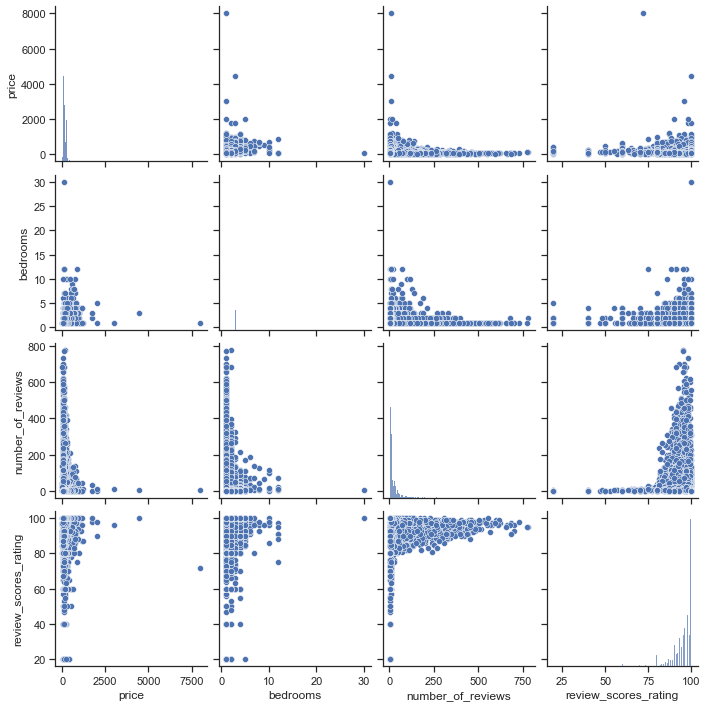

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[['price',
                 'bedrooms',
                 'number_of_reviews',
                 'review_scores_rating',
                ]])

In [11]:
# sns.pairplot(df[['price',
#                 'number_of_reviews',
#                 'reviews_per_month',
#                 'review_scores_rating',
#                 'review_scores_accuracy',
#                 'review_scores_cleanliness',
#                 'review_scores_checkin',
#                 'review_scores_communication',
#                 'review_scores_location',
#                 'review_scores_value'
#                 ]])
# df[['price',
#                 'number_of_reviews',
#                 'reviews_per_month',
#                 'review_scores_rating',
#                 'review_scores_accuracy',
#                 'review_scores_cleanliness',
#                 'review_scores_checkin',
#                 'review_scores_communication',
#                 'review_scores_location',
#                 'review_scores_value'
#                 ]].hist(figsize=(20,20), bins=100)

Price: 


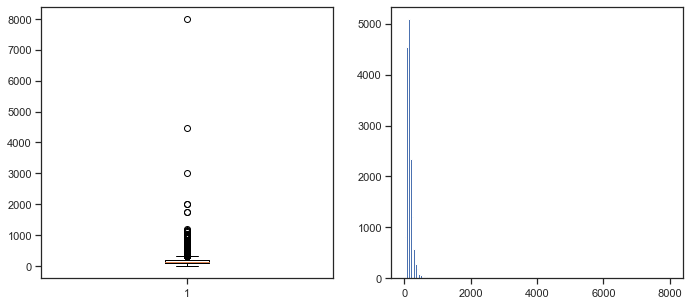

In [12]:
# Посмотрим на распределение цен на апартаменты:
series = df['price']
print('Price: ')

plt.figure(figsize=(11.5, 5))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()




<AxesSubplot:xlabel='property_type_computed', ylabel='price'>

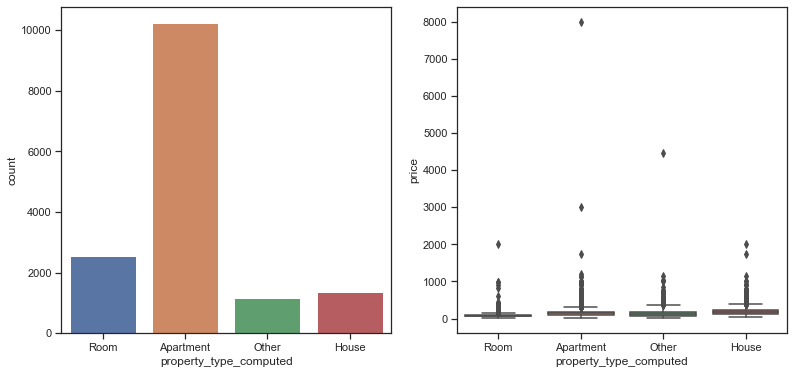

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type_computed', data=df)
plt.subplot(122)
sns.boxplot(x="property_type_computed", y="price",data=df)

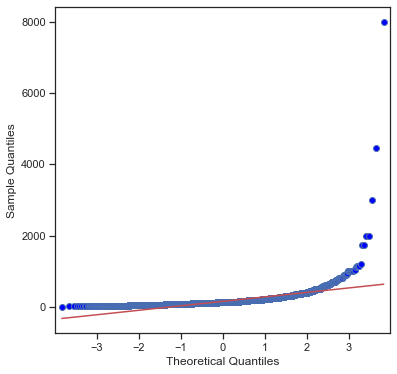

In [14]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(df['price'], ax=ax, line='s')
plt.show()

In [15]:
triple_std_dev = df['price'].std(axis=0) * 3
print(triple_std_dev)
less_than_upper_bound = df.loc[(df['price'] < triple_std_dev)]
print('Percentage left: ' + str(100 * (len(less_than_upper_bound)/len(df))))
df = less_than_upper_bound

377.2833996760696
Percentage left: 96.93231512303375


<AxesSubplot:xlabel='price', ylabel='property_type_freq'>

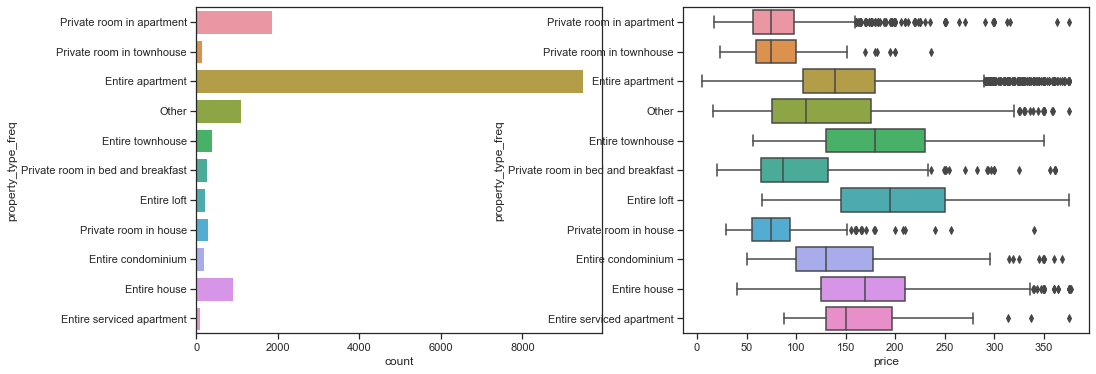

In [16]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.countplot(y='property_type_freq', data=df)
plt.subplot(122)
sns.boxplot(y="property_type_freq", x="price",data=df)

<AxesSubplot:xlabel='property_type_computed', ylabel='price'>

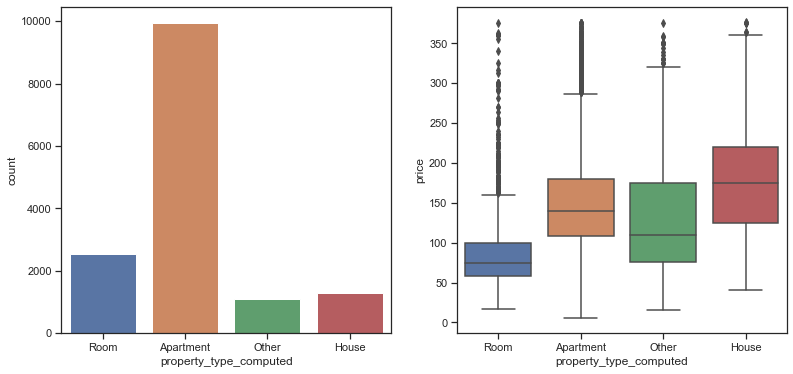

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='property_type_computed', data=df)
plt.subplot(122)
sns.boxplot(x="property_type_computed", y="price",data=df)

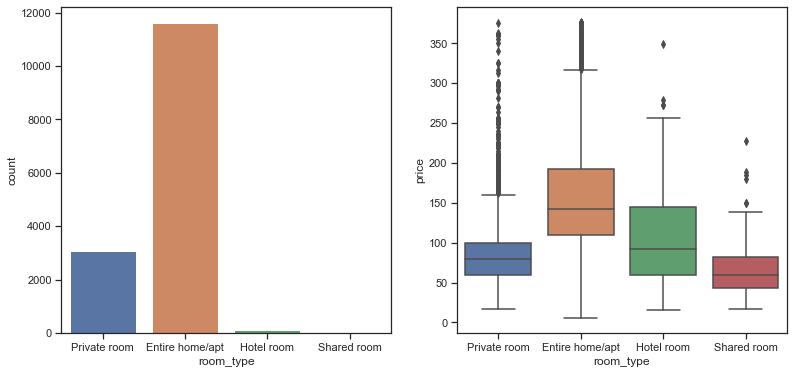

In [18]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
sns.countplot(x='room_type', data=df)
plt.subplot(122)
sns.boxplot(x="room_type", y="price",data=df)
plt.show()

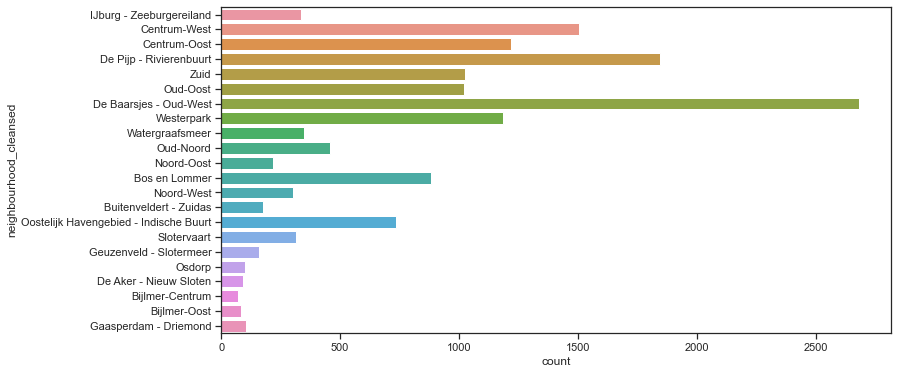

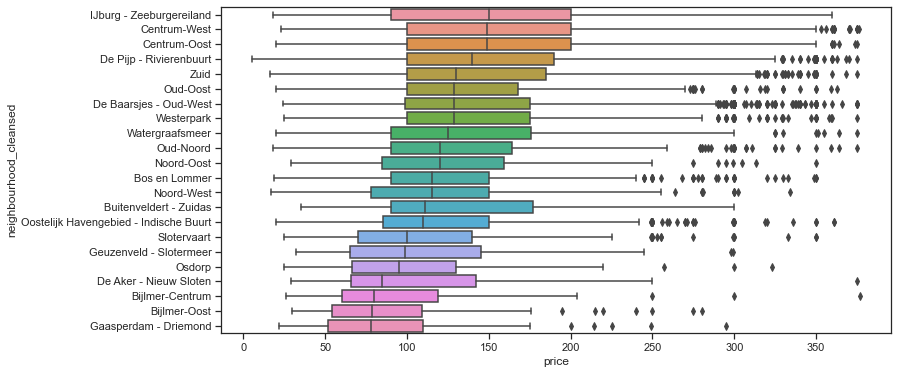

In [19]:
median_arr =  df.groupby('neighbourhood_cleansed',observed=True)['price'].transform('median')
price_ordered_df = df.loc[median_arr.sort_values(ascending=False).index]

plt.figure(figsize=(12, 6))
# plt.subplot(121)
sns.countplot(y='neighbourhood_cleansed', data=price_ordered_df)
plt.show()

plt.figure(figsize=(12, 6))
# plt.subplot(122)\
sns.boxplot(y="neighbourhood_cleansed", x="price",data=price_ordered_df)
plt.show()

In [20]:
# Чтобы т
# price_ordered_df[''].astype('category').cat.categories.tolist()
# df.groupby(price_df, as_index=False, observed=True).median().cat.categories.tolist()

fanciness_map = {
    'Bijlmer-Centrum': 0,
    'Bijlmer-Oost': 0,
    'Bos en Lommer': 1,
    'Buitenveldert - Zuidas': 1,
    'Centrum-Oost': 2,
    'Centrum-West': 2,
    'De Aker - Nieuw Sloten': 0,
    'De Baarsjes - Oud-West': 2,
    'De Pijp - Rivierenbuurt': 2,
    'Gaasperdam - Driemond': 0,
    'Geuzenveld - Slotermeer': 0,
    'IJburg - Zeeburgereiland': 2,
    'Noord-Oost': 1,
    'Noord-West': 1,
    'Oostelijk Havengebied - Indische Buurt': 1,
    'Osdorp': 0,
    'Oud-Noord': 1,
    'Oud-Oost': 2,
    'Slotervaart': 0,
    'Watergraafsmeer': 1,
    'Westerpark': 2,
    'Zuid': 2
}

text_map = {
    0: 'low',
    1: 'medium',
    2: 'high',
}

# df[["neighbourhood_cleansed"]].join(median_arr).sort_values('price')['neighbourhood_cleansed'].astype('category').cat.categories.tolist()

df['district_class'] = df['neighbourhood_cleansed'].map(fanciness_map).astype('int')
df['district_class_cat'] = df['district_class'].map(text_map).astype('category')

<ipython-input-20-f15f84bd0b07>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_class'] = df['neighbourhood_cleansed'].map(fanciness_map).astype('int')
<ipython-input-20-f15f84bd0b07>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['district_class_cat'] = df['district_class'].map(text_map).astype('category')


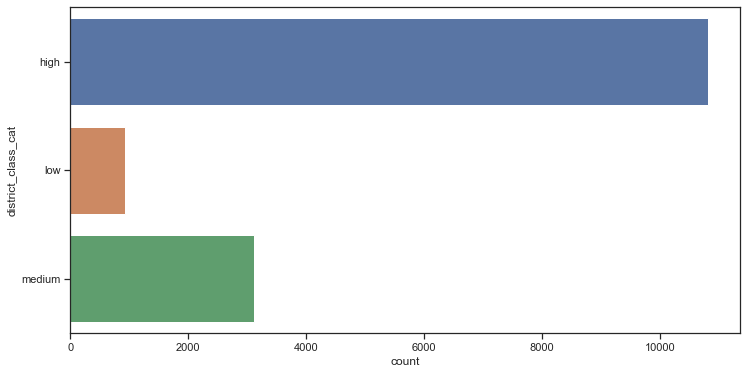

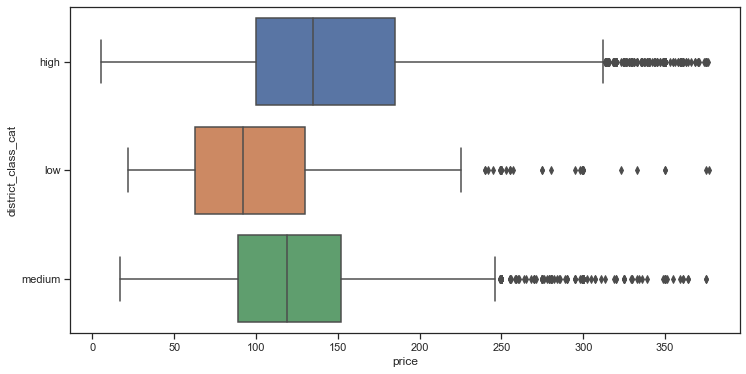

In [21]:
median_arr =  df.groupby('district_class',observed=True)['price'].transform('median')
price_ordered_df = df.loc[median_arr.sort_values(ascending=False).index]

plt.figure(figsize=(12, 6))
# plt.subplot(121)
sns.countplot(y='district_class_cat', data=price_ordered_df)
plt.show()

plt.figure(figsize=(12, 6))
# plt.subplot(122)\
sns.boxplot(y="district_class_cat", x="price",data=price_ordered_df)
plt.show()

In [22]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
# normality test for log
stat, p = normaltest(np.log(df['price']))
print('Log statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Log sample looks Gaussian (fail to reject H0)')
else:
	print('Log sample does not look Gaussian (reject H0)')

Statistics=1848.735, p=0.000
Sample does not look Gaussian (reject H0)
Log statistics=398.440, p=0.000
Log sample does not look Gaussian (reject H0)


Price: 


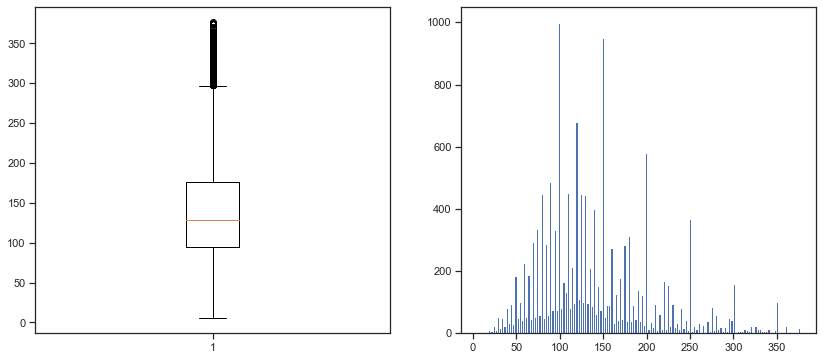

In [23]:
series = df['price']
print('Price: ')

plt.figure(figsize=(14, 6))

# sp1
plt.subplot(121)
plt.boxplot(series)

# sp2
plt.subplot(122)
plt.hist(series, bins= int(len(df['price'])/100))

plt.show()

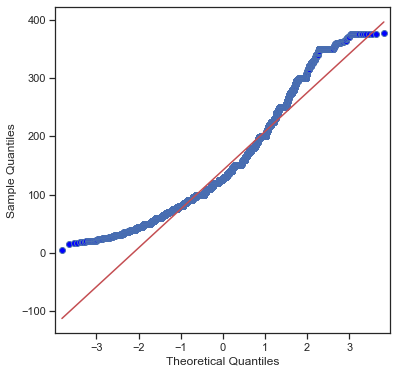

In [24]:
import statsmodels

fig, ax = plt.subplots(figsize=(6, 6))
statsmodels.graphics.gofplots.qqplot(df['price'], ax=ax, line='s')
plt.show()

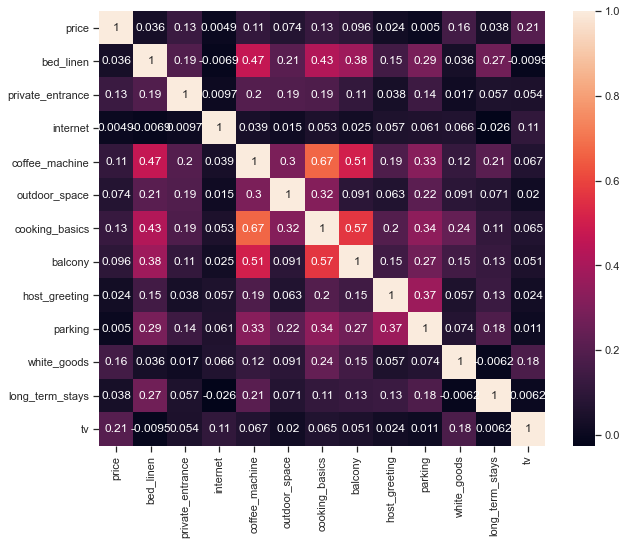

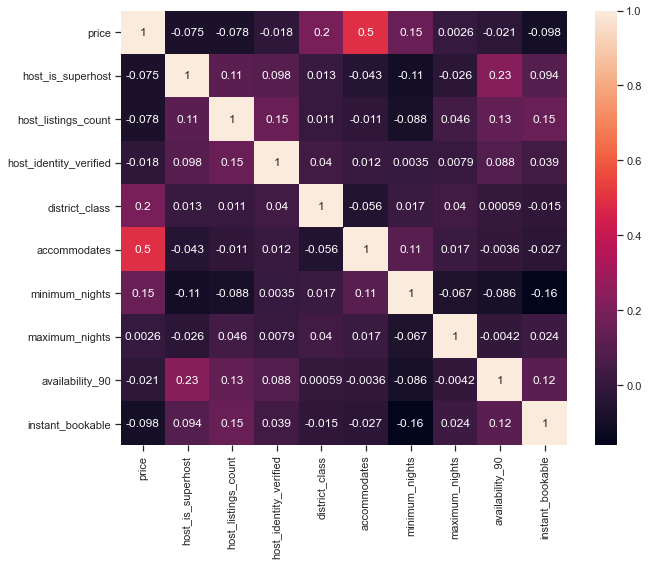

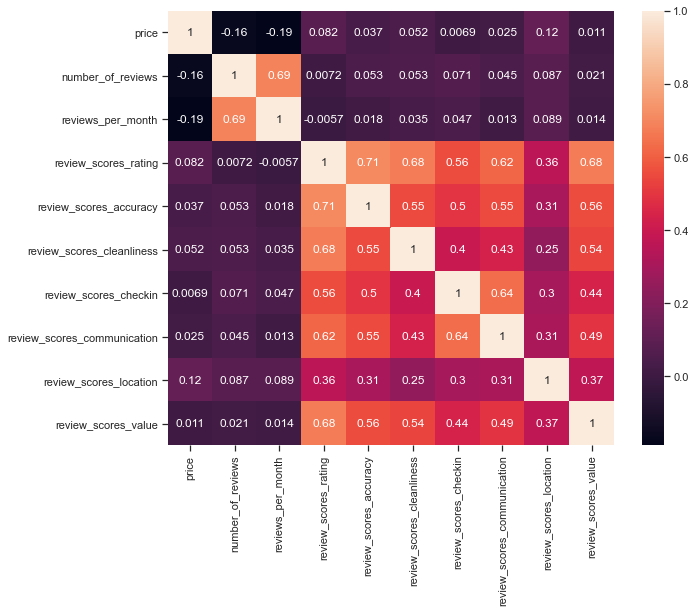

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price']+INCLUDED_AMENITIES].corr(method='kendall'), annot=True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[['price']+['host_is_superhost',
              'host_listings_count',
              'host_identity_verified',
#             'neighbourhood_cleansed',
              'district_class',
#               'property_type_computed',
#               'room_type',
#               'property_type_computed',
#               'property_type_freq',
              'accommodates',
#               'bedrooms',
              'minimum_nights',
              'maximum_nights',
              'availability_90',
              'instant_bookable',
]].corr(method='spearman'), annot=True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[['price']+[
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
]].corr(method='pearson'), annot=True)
plt.show()

In [26]:
# df['price'] = np.log(df['price']) #logarithm improves prediction by around 0.05 - 0.1

# Определяем данные для модели

TARGET_COLUMN = 'price'
ALL_BUT_TARGET_COLUMN = df.columns[df.columns != TARGET_COLUMN]

REVIEW_PREDICTORS = [
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
]

ORIGINAL_PREDICTORS = ['host_is_superhost',
              'host_listings_count',
              'host_identity_verified',
            'neighbourhood_cleansed',
#               'district_class_cat',
              'property_type_computed',
#               'room_type',
              'accommodates',
              'bedrooms',
              'minimum_nights',
              'maximum_nights',
              'availability_90',
              'instant_bookable',
]

PREDICTORS = ORIGINAL_PREDICTORS + INCLUDED_AMENITIES + REVIEW_PREDICTORS

PREDICTORS

['host_is_superhost',
 'host_listings_count',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'property_type_computed',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'availability_90',
 'instant_bookable',
 'bed_linen',
 'private_entrance',
 'internet',
 'coffee_machine',
 'outdoor_space',
 'cooking_basics',
 'balcony',
 'host_greeting',
 'parking',
 'white_goods',
 'long_term_stays',
 'tv',
 'number_of_reviews',
 'reviews_per_month',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [27]:
# Готовим датасет для моделей
from patsy import dmatrices
import seaborn as sns

# Уравнение регрессии
equation = TARGET_COLUMN + ' ~ ' + (' + '.join(PREDICTORS))

# data_to_transform = df.where(df['property_type_computed'] == 'Apartment')
data_to_transform = df

y, X = dmatrices(equation, data=data_to_transform, return_type='dataframe')

renamer = lambda x: x.replace('[', '_').replace(']', '')

y = y.rename(columns = renamer)
X = X.rename(columns = renamer)

In [28]:
# Разбиваем выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
# Градиентиный бустинг c деревьями
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

In [30]:
from sklearn.model_selection import GridSearchCV


# Выполняется долго, можно сходить попить чайку
# Пробуем перебрать разные модели:

# param_test1 = {
#     'max_depth': range(1,10,2),
#     'min_child_weight': range(1,10,2)
#     'colsample_bytree': [0.3, 0.9],
#     'colsample_bytree': np.arange(0.3, 1, 0.1),
#     'alpha': np.arange(0, 1, 0.1),
#     'gamma': np.arange(0, 1, 0.1),
#       'alpha': [0, 0.01],
#       'gamma': [0, 0.01],
#     'learning_rate': range(0, 1, 0.1),
#     'n_estimators': [10, 50, 100]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(objective ='reg:squarederror',
#                           n_jobs = 8,
#                           tree_method='gpu_hist',
#                           colsample_bytree = 0.5,
#                           learning_rate = 0.01,
#                           max_depth = 5,
#                           min_child_weight = 3,
#                           alpha = 0,
#                           gamma = 0,
#                           n_estimators = 500,
#                           seed=123),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5, verbose=1)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [61]:
# Параметры для сгруппированных гео-предикторов
# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
#                           n_jobs = 8,
#                           tree_method='gpu_hist',
#                           colsample_bytree = 0.5,
#                           learning_rate = 0.01,
#                           max_depth = 5,
#                           min_child_weight = 3,
#                           alpha = 0.0,
#                           gamma = 0.0,
#                           n_estimators = 1000,
#                           seed=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          n_jobs = 8,
                          tree_method='gpu_hist',
                          colsample_bytree = 0.4,
                          learning_rate = 0.01,
                          max_depth = 9,
                          min_child_weight = 4,
                          alpha = 0,
                          gamma = 0,
                          n_estimators = 1000,
                          seed=123)

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [62]:
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)
print(xg_reg)

MSE: 2264.002
Mean Error: 47.582$
R^2: 0.510
Adjusted R^2: 0.508
XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=9,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='gpu_hist', validate_parameters=1,
             verbosity=None)


Text(0.5, 1.0, 'Prediction quality')

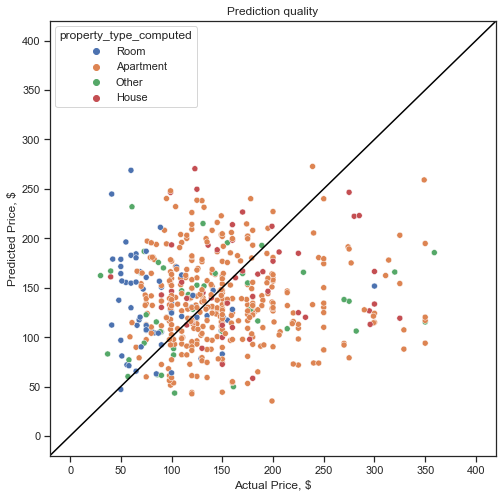

In [63]:
# y_test['price']

pred_scatter_index = range(0, len(y_test))

vec_test = pd.Series(y_test['price'], index = pred_scatter_index, dtype='float')
vec_pred = pd.Series(preds, index = pred_scatter_index, dtype='float')
        
frame = { 'Actual Price, $': vec_test, 'Predicted Price, $': vec_pred,} 
  
comp_df = pd.DataFrame(frame, index=pred_scatter_index).join(data_to_transform['property_type_computed'].reindex(pred_scatter_index))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type_computed',
                data=comp_df).set_title('Prediction quality')

Text(0.5, 1.0, 'Prediction quality: Other')

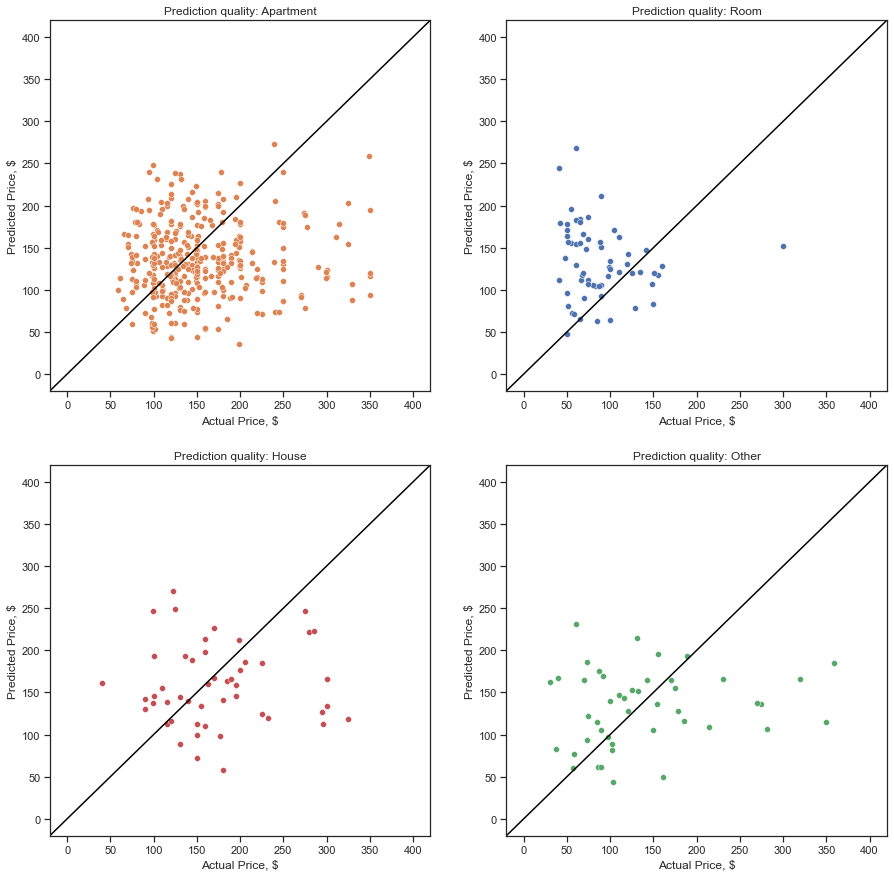

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(15, 15))

ax1.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax1,
                color='#DD8452',
                data=comp_df.where(df['property_type_computed']=='Apartment')).set_title('Prediction quality: Apartment')

ax2.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax2,
                color='#4C72B0',
                data=comp_df.where(df['property_type_computed']=='Room')).set_title('Prediction quality: Room')


ax3.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax3,
                color='#C44E52',
                data=comp_df.where(df['property_type_computed']=='House')).set_title('Prediction quality: House')

ax4.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                ax=ax4,
                color='#55A868',
                data=comp_df.where(df['property_type_computed']=='Other')).set_title('Prediction quality: Other')

In [65]:
ft_weights_xgb_reg = pd.DataFrame(xg_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg

weight
property_type_computed_T.Room                       0.156601
accommodates                                        0.130099
bedrooms                                            0.100651
neighbourhood_cleansed_T.Centrum-West               0.059633
neighbourhood_cleansed_T.Centrum-Oost               0.032906
neighbourhood_cleansed_T.Noord-West                 0.024527
tv                                                  0.022284
neighbourhood_cleansed_T.Geuzenveld - Slotermeer    0.021039
review_scores_location                              0.019586
neighbourhood_cleansed_T.Noord-Oost                 0.017869
neighbourhood_cleansed_T.Bos en Lommer              0.017641
neighbourhood_cleansed_T.Gaasperdam - Driemond      0.017176
neighbourhood_cleansed_T.Slotervaart                0.017023
property_type_computed_T.House                      0.015353
neighbourhood_cleansed_T.De Pijp - Rivierenbuurt    0.014791
neighbourhood_cleansed_T.Bijlmer-Oost               0.014362
neighbourhood_cleansed_T.Oostelijk Havengebied ...  0.012990
neighbourhood_cleansed_T.Zuid                       0.012752
reviews_per_month                                   0.012584
host_listings_count                                 0.012294
property_type_computed_T.Other                      0.011917
neighbourhood_cleansed_T.De Aker - Nieuw Sloten     0.011347
neighbourhood_cleansed_T.Oud-Noord                  0.011211
neighbourhood_cleansed_T.Osdorp                     0.011184
availability_90                                     0.010377
coffee_machine                                      0.009771
white_goods                                         0.009009
neighbourhood_cleansed_T.Watergraafsmeer            0.008769
neighbourhood_cleansed_T.IJburg - Zeeburgereiland   0.008751
internet                                            0.008687
minimum_nights                                      0.008599
neighbourhood_cleansed_T.De Baarsjes - Oud-West     0.008578
long_term_stays                                     0.008279
private_entrance                                    0.008142
maximum_nights                                      0.008078
number_of_reviews                                   0.007960
neighbourhood_cleansed_T.Westerpark                 0.007958
review_scores_checkin                               0.007879
neighbourhood_cleansed_T.Oud-Oost                   0.007592
review_scores_rating                                0.007392
cooking_basics                                      0.007289
parking                                             0.006783
neighbourhood_cleansed_T.Buitenveldert - Zuidas     0.006755
bed_linen                                           0.006621
outdoor_space                                       0.006602
review_scores_communication                         0.006291
review_scores_cleanliness                           0.006267
review_scores_accuracy                              0.006203
review_scores_value                                 0.006188
host_is_superhost                                   0.006032
balcony                                             0.005519
instant_bookable                                    0.005299
host_identity_verified                              0.005261
host_greeting                                       0.005249
Intercept                                           0.000000

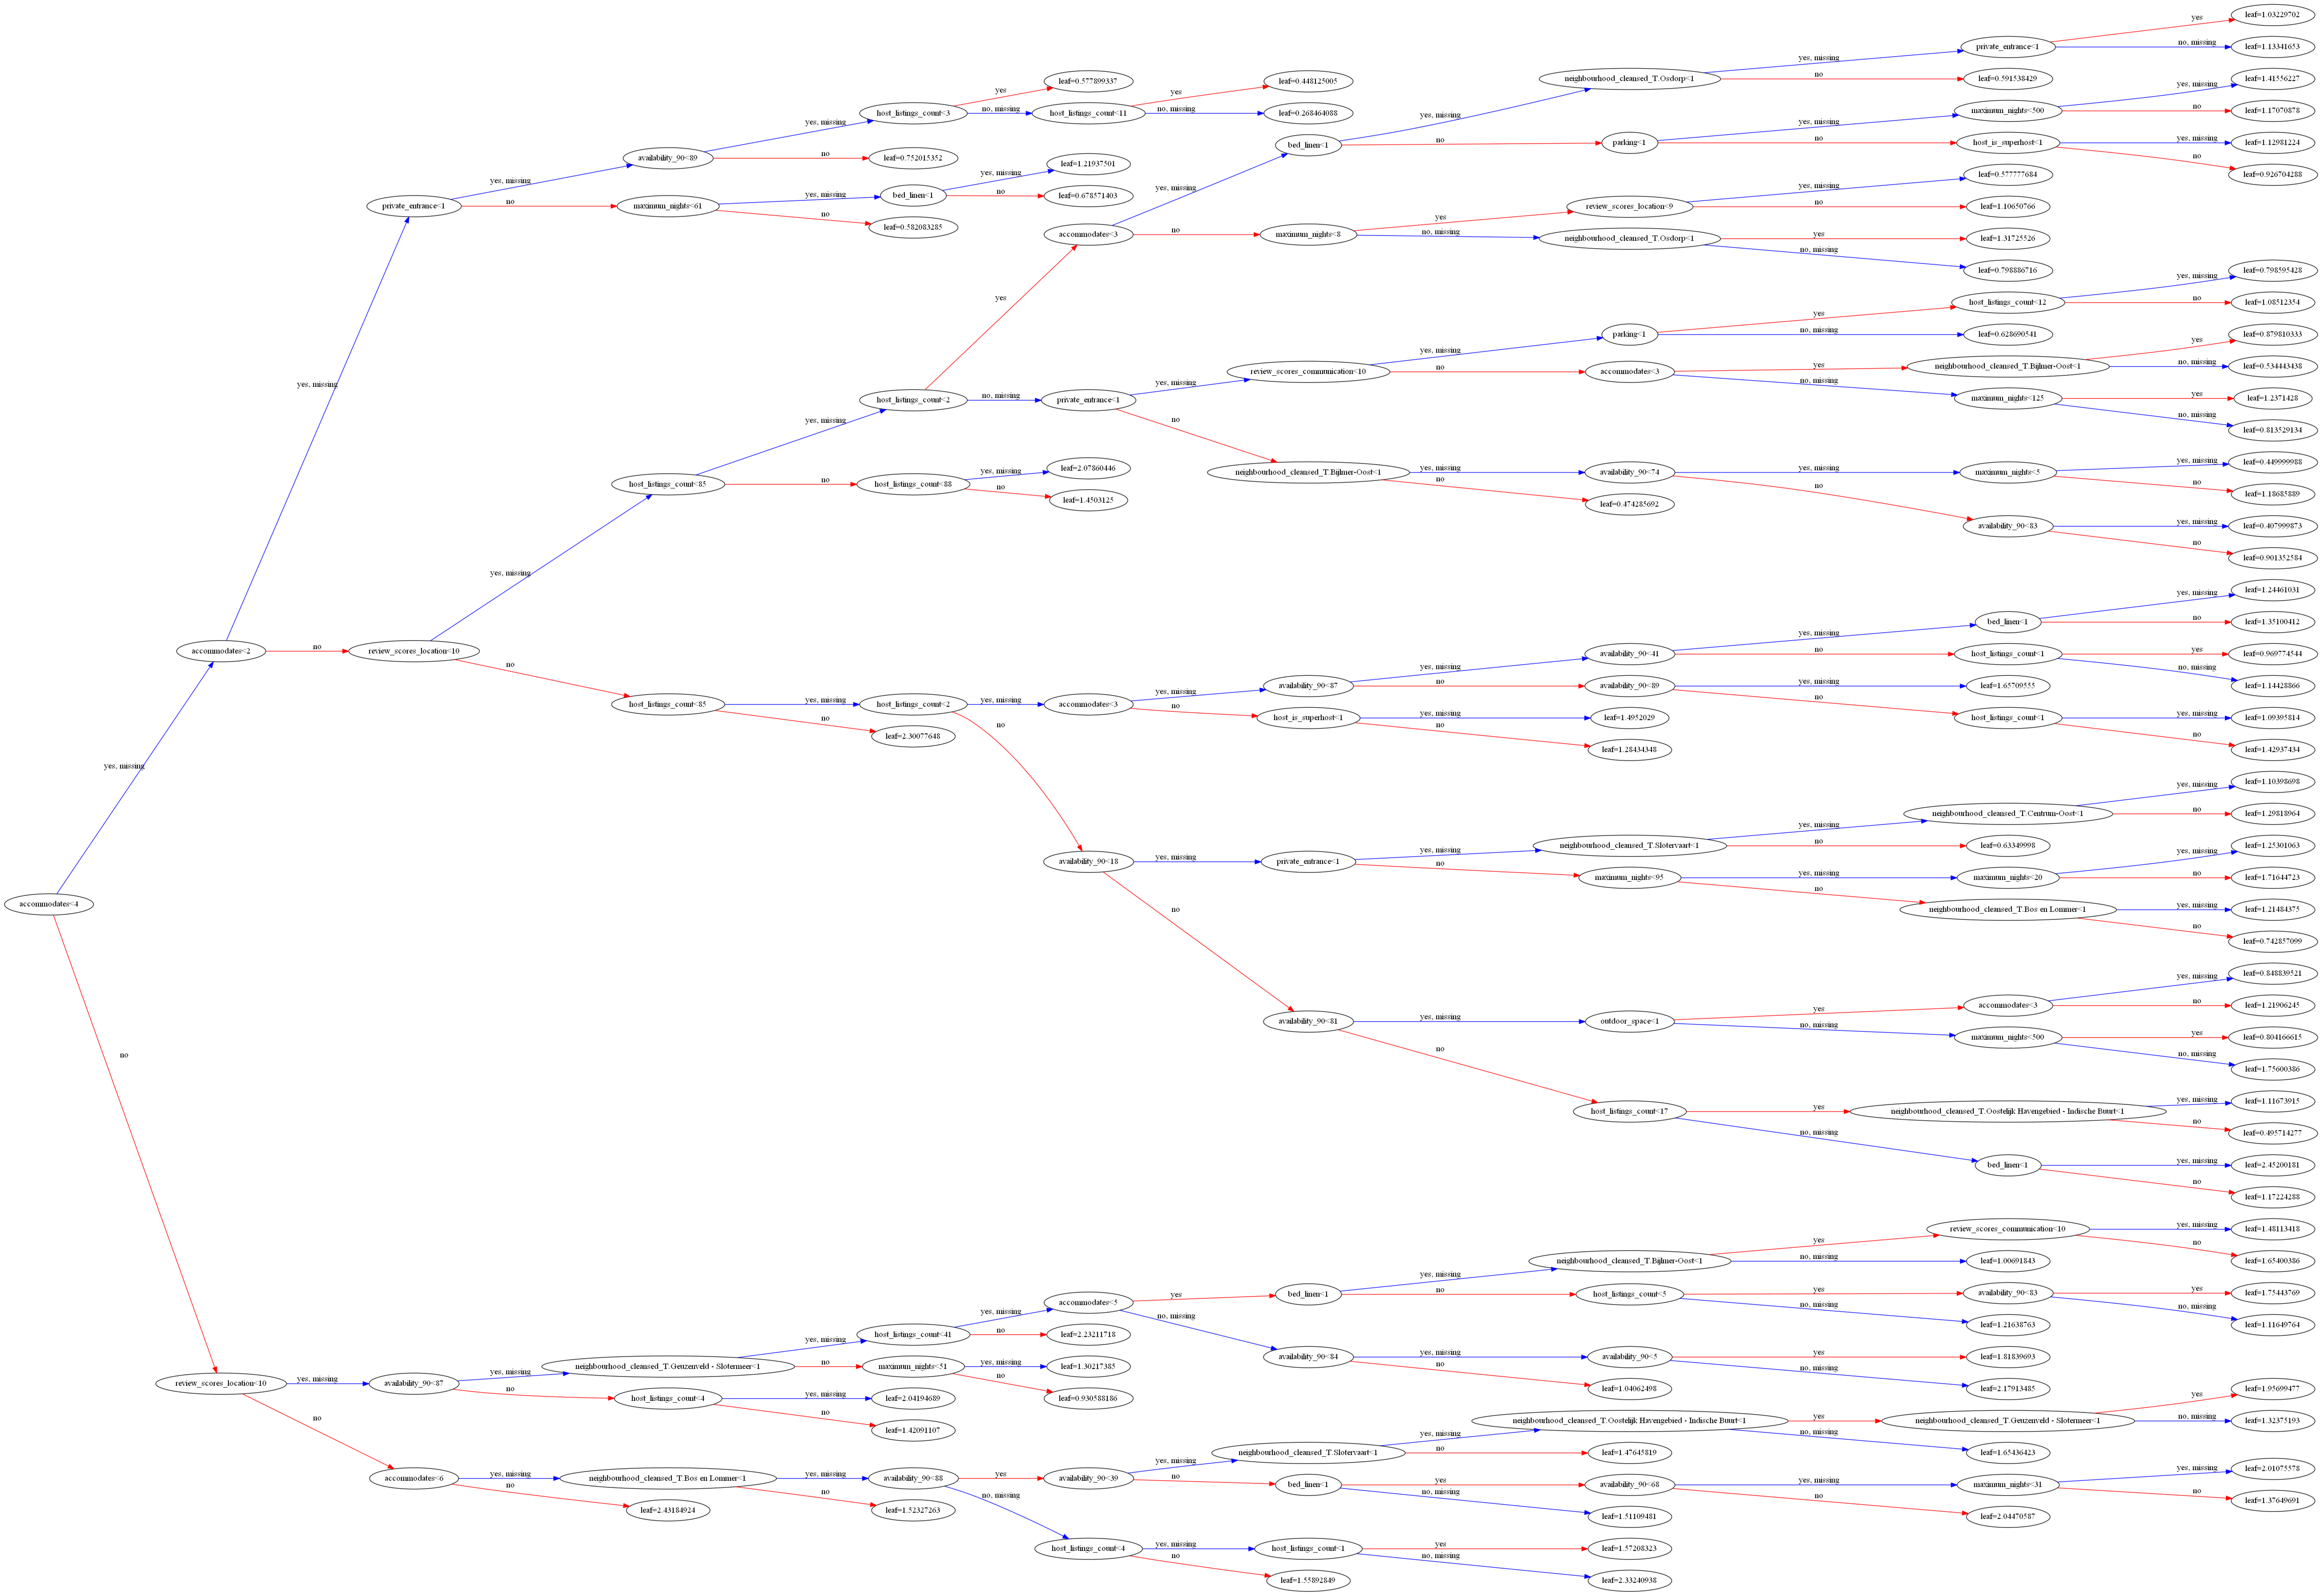

In [69]:
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files/Graphviz/bin/' # Можно добавить graphviz руками
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,120

# xgb.plot_tree(xg_reg, rankdir='LR'); plt.show()
xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR');
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
# xgb.plot_tree(xg_reg, num_trees=0, rankdir='LR'); plt.show()

In [70]:
# param_test1 = {
#     'alpha': np.arange(0, 1, 0.1),
#     'lambda': np.arange(0, 1, 0.1),
#     'learning_rate': [0.01],
#     'n_estimators': [1000]
# }
# gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(objective ='reg:squarederror',
#                                               booster='gblinear',
#                                               learning_rate = 0.01,
#                                               alpha = 0.4,
#                                               n_jobs = 8,
#                                               n_estimators = 1000),
#                         param_grid = param_test1, scoring='r2',n_jobs=8, cv=5, verbose=1)
# gsearch1.fit(X_train,y_train) 
# gsearch1.cv_results_ , gsearch1.best_params_, gsearch1.best_score_

In [71]:
# Попробуем регрессионный бустинг
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import numpy as np

xg_reg_linear = xgb.XGBRegressor(objective ='reg:squarederror',
                          booster='gblinear',
                          learning_rate = 0.01,
                          reg_alpha = 0,
                          reg_lambda = 0,
                          n_jobs = 8,
                          n_estimators = 1000)

xg_reg_linear.fit(X_train,y_train)

preds_lin = xg_reg_linear.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, preds_lin)
rmse = np.sqrt(mean_squared_error(y_test, preds_lin))
r2 = r2_score(y_test, preds_lin)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)
print(xg_reg_linear)

MSE: 2682.371
Mean Error: 51.792$
R^2: 0.419
Adjusted R^2: 0.417
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=8, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)


In [73]:
# ft_weights_xgb_reg = pd.DataFrame(xg_reg_linear.feature_importances_, columns=['weight'], index=X_train.columns)
# ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
# ft_weights_xgb_reg

# Вывод: деревья лучше, но не понятно, как они работают

In [74]:
# Пробуем использовать либу для обычной регрессии
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices

model = sm.OLS(y_train, X_train)
# result = model.fit_regularized(method='elastic_net',alpha=0.01, L1_wt=0.5)
result = model.fit()
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:14:33   Log-Likelihood:                -63457.
No. Observations:               11880   AIC:                         1.270e+05
Df Residuals:                   11825   BIC:                         1.274e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                         -18.7066     11.997     -1.559      0.119     -42.223       4.810
neighbourhood_cleansed_T.Bijlmer-Oost                               1.4176      8.915      0.159      0.874     -16.057      18.892
neighbourhood_cleansed_T.Bos en Lommer                              9.4755      6.742      1.405      0.160      -3.740      22.691
neighbourhood_cleansed_T.Buitenveldert - Zuidas                    10.0711      7.702      1.308      0.191      -5.026      25.169
neighbourhood_cleansed_T.Centrum-Oost                              43.5109      6.702      6.493      0.000      30.375      56.647
neighbourhood_cleansed_T.Centrum-West                              47.1125      6.677      7.056      0.000      34.025      60.200
neighbourhood_cleansed_T.De Aker - Nieuw Sloten                    -1.1891      8.621     -0.138      0.890     -18.087      15.709
neighbourhood_cleansed_T.De Baarsjes - Oud-West                    25.4000      6.583      3.859      0.000      12.497      38.303
neighbourhood_cleansed_T.De Pijp - Rivierenbuurt                   31.5550      6.640      4.753      0.000      18.540      44.570
neighbourhood_cleansed_T.Gaasperdam - Driemond                     -9.5245      8.499     -1.121      0.262     -26.184       7.135
neighbourhood_cleansed_T.Geuzenveld - Slotermeer                   -7.4809      7.844     -0.954      0.340     -22.856       7.894
neighbourhood_cleansed_T.IJburg - Zeeburgereiland                  15.7181      7.190      2.186      0.029       1.624      29.812
neighbourhood_cleansed_T.Noord-Oost                                -2.5722      7.498     -0.343      0.732     -17.270      12.126
neighbourhood_cleansed_T.Noord-West                                -5.3278      7.283     -0.731      0.464     -19.604       8.949
neighbourhood_cleansed_T.Oostelijk Havengebied - Indische Buurt    11.5722      6.800      1.702      0.089      -1.757      24.901
neighbourhood_cleansed_T.Osdorp                                    -2.3091      8.472     -0.273      0.785     -18.916      14.297
neighbourhood_cleansed_T.Oud-Noord                                  3.5728      7.055      0.506      0.613     -10.256      17.401
neighbourhood_cleansed_T.Oud-Oost                                  21.4198      6.733      3.181      0.001       8.223      34.617
neighbourhood_cleansed_T.Slotervaart                                4.5468      7.168      0.634      0.526      -9.503      18.597
neighbourhood_cleansed_T.Watergraafsmeer                           13.0543      7.121      1.833      0.067      -0.905      27.014
neighbourhood_cleansed_T.Westerpark            

In [75]:
y_pred_ols = result.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_ols))
r2 = r2_score(y_test, y_pred_ols)
adjusted_r_2 = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('MSE: %.3f' % mse)
print('Mean Error: %.3f$' % rmse)
print('R^2: %.3f' % r2)
print('Adjusted R^2: %.3f' % adjusted_r_2)

MSE: 2616.375
Mean Error: 51.151$
R^2: 0.433
Adjusted R^2: 0.431


Text(0.5, 1.0, 'Prediction quality')

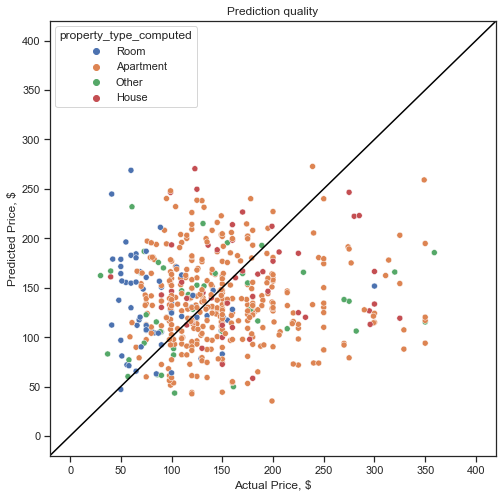

In [76]:
pred_scatter_index_ols = range(0, len(y_test))

vec_test_ols = pd.Series(y_test['price'], index = pred_scatter_index_ols, dtype='float')
vec_pred_ols = pd.Series(y_pred_ols, index = pred_scatter_index_ols, dtype='float')
        
frame = { 'Actual Price, $': vec_test, 'Predicted Price, $': vec_pred,} 
  
comp_df_ols = pd.DataFrame(frame, index=pred_scatter_index_ols).join(df['property_type_computed'].reindex(pred_scatter_index_ols))

plt.figure(figsize=(8, 8))
plt.axline((0, 0), (400, 400), color='black')
sns.scatterplot(x='Actual Price, $',
                y='Predicted Price, $',
                hue='property_type_computed',
                data=comp_df).set_title('Prediction quality')